# Software analytics: Increase code review speed — impact on global colaboration in large projects

## Imports

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kruskal
import scipy.stats as stats

## Load data

https://zenodo.org/records/3922907

In [48]:
def load_data():
    data = pd.read_csv('./data/new_pullreq.csv', header=0)
    return data
data = load_data()
data

,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
0,1,13708387,stylelint,stylelint,1,237,237.0,1,0,0,...,0,0,0,0,30.0,1,0.007948,0,237,0
1,2,100297899,Joaogarciadelima,checklistos,0,1410,NaN,1,0,0,...,0,2,0,0,597.0,0,0.830769,0,1410,0
2,3,93139005,binary-com,SmartCharts,1,4,4.0,1,0,0,...,0,0,0,0,2.0,0,0.314368,0,4,0
3,4,15059440,letsencrypt,boulder,1,52,52.0,1,9,104,...,0,0,0,0,1.0,0,0.117332,0,52,0
4,5,29684214,PyCQA,astroid,1,2414,2414.0,1,33,27,...,0,0,0,0,2.0,0,0.010753,0,2414,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347932,3347933,30544060,Kronos-Integration,kronos-service-consul,1,9,9.0,1,0,0,...,0,0,0,0,2537.0,0,0.696970,0,9,0
3347933,3347934,1142,saltstack,salt,0,1165,NaN,1,10,0,...,0,1,0,0,42.0,0,0.056849,0,1165,0
3347934,3347935,31499094,mjmlio,mjml,1,8834,8834.0,2,6,0,...,0,8,0,0,597.0,0,0.002041,0,8834,0
3347935,3347936,55317,zotonic,zotonic,0,703,NaN,7,15,0,...,0,0,0,0,10.0,0,0.000732,0,703,0


In [49]:
for key in data.keys():
    print(key)

id
project_id
ownername
reponame
merged_or_not
lifetime_minutes
mergetime_minutes
num_commits
src_churn
test_churn
files_added
files_deleted
files_modified
files_changed
src_files
doc_files
other_files
num_commit_comments
num_issue_comments
num_comments
num_participants
sloc
team_size
perc_external_contribs
commits_on_files_touched
test_lines_per_kloc
test_cases_per_kloc
asserts_per_kloc
watchers
prev_pullreqs
requester_succ_rate
followers
churn_addition
churn_deletion
pr_comment_num
comment_num
perc_neg_emotion
perc_pos_emotion
perc_neu_emotion
part_num_issue
part_num_commit
part_num_pr
part_num_code
comment_conflict
hash_tag
at_tag
test_inclusion
description_length
bug_fix
ci_exists
ci_latency
ci_build_num
ci_test_passed
ci_failed_perc
ci_first_build_status
ci_last_build_status
language
fork_num
project_age
open_issue_num
pr_succ_rate
open_pr_num
first_response_time
pushed_delta
acc_commit_num
first_pr
account_creation_days
core_member
contrib_gender
contrib_country
contrib_affiliati

## Overview  & filtering of data of large projects

Number of projects: 11230


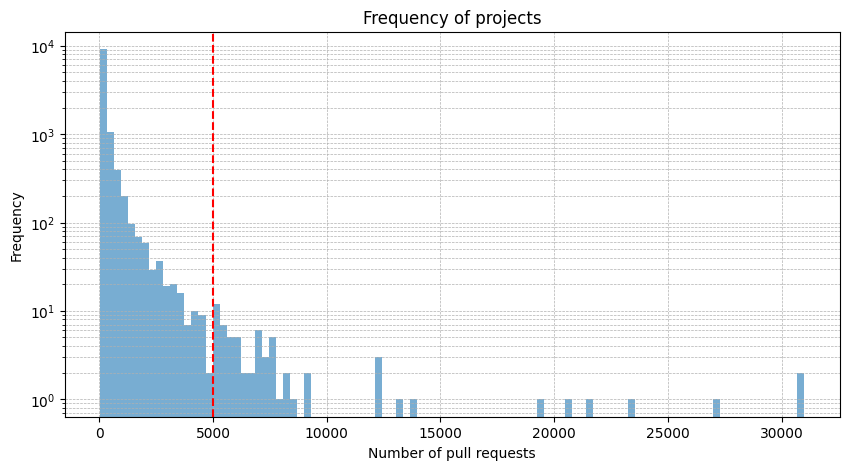

Mean number of pull requests: 298.12439893143363
Median number of pull requests: 96.0
Standard deviation of pull requests: 919.5069983233892
Maximum number of pull requests: 31007
Minimum number of pull requests: 20
Number of project with more than 5000 pull requests: 64


In [50]:
num_projects = data['project_id'].unique()
print('Number of projects: {}'.format(len(num_projects)))

projects = data['project_id'].value_counts()
project_ids = projects.index
num_pull_requests = projects.values

plt.figure(figsize=(10, 5))
plt.hist(num_pull_requests, bins=100, alpha=0.6, log=True)
plt.axvline(x=5000, color='r', linestyle='--')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Frequency of projects')
plt.xlabel('Number of pull requests')
plt.ylabel('Frequency')
plt.show()

print('Mean number of pull requests: {}'.format(np.mean(num_pull_requests)))
print('Median number of pull requests: {}'.format(np.median(num_pull_requests)))
print('Standard deviation of pull requests: {}'.format(np.std(num_pull_requests)))
print('Maximum number of pull requests: {}'.format(np.max(num_pull_requests)))  
print('Minimum number of pull requests: {}'.format(np.min(num_pull_requests)))

print('Number of project with more than 5000 pull requests: {}'.format(len(projects[num_pull_requests > 5000])))
filtered_project_ids_pr = projects[num_pull_requests > 5000].index

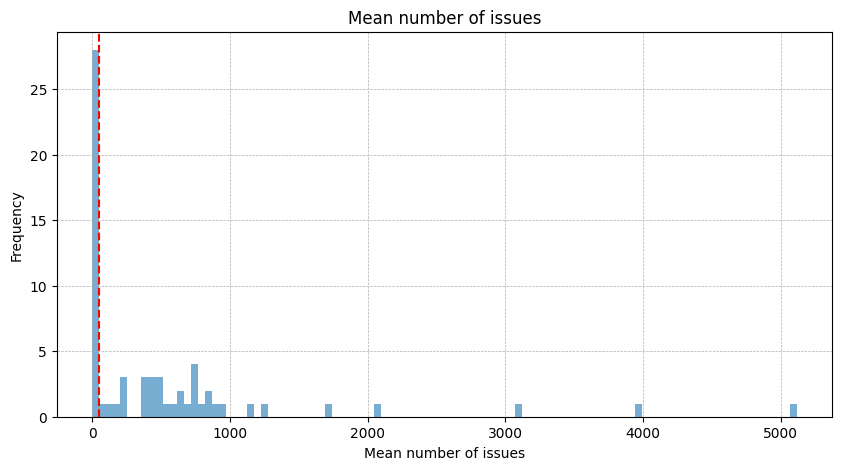

Mean number of issues: 533.6983378572712
Median number of issues: 223.95945367728729
Standard deviation of issues: 913.7737525230855
Maximum number of issues: 5114.82380743556
Minimum number of issues: 0.0
Number of project with more than 50 issues: 36


In [51]:
opened_issues = data[data['project_id'].isin(filtered_project_ids_pr)].groupby('project_id')['open_issue_num'].mean()

plt.figure(figsize=(10, 5))
plt.hist(opened_issues, bins=100, alpha=0.6)
plt.axvline(x=50, color='r', linestyle='--')
plt.xlabel('Mean number of issues')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Mean number of issues')
plt.show()

print('Mean number of issues: {}'.format(np.mean(opened_issues)))
print('Median number of issues: {}'.format(np.median(opened_issues)))
print('Standard deviation of issues: {}'.format(np.std(opened_issues)))
print('Maximum number of issues: {}'.format(np.max(opened_issues)))
print('Minimum number of issues: {}'.format(np.min(opened_issues)))

filtered_project_ids_issue = opened_issues[opened_issues > 50].index
print('Number of project with more than 50 issues: {}'.format(len(filtered_project_ids_issue)))

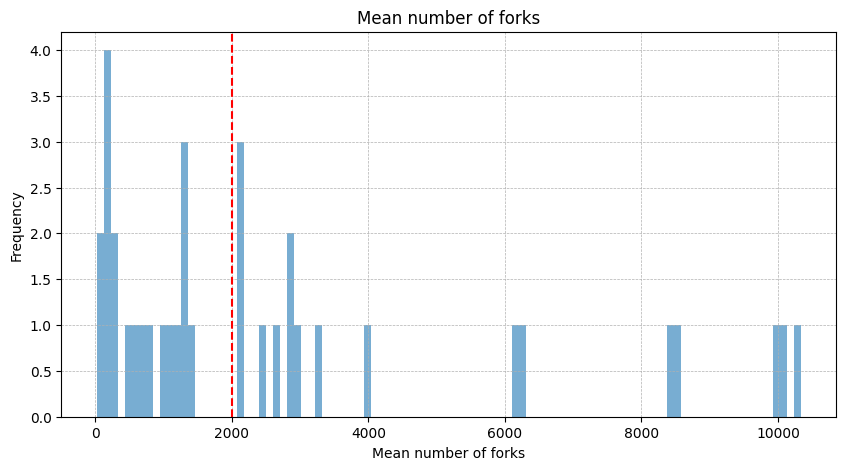

Mean number of forks: 2770.902336516114
Median number of forks: 1392.0325528649205
Standard deviation of number of forks: 3138.607774676715
Max number of forks: 10339.12191200117
Min number of forks: 17.9272476340694
Number of project with more than 2000 forks: 17


In [52]:
forks = data[data['project_id'].isin(filtered_project_ids_issue)].groupby('project_id')['fork_num'].mean()
plt.figure(figsize=(10, 5))
plt.hist(forks, bins=100, alpha=0.6)
plt.axvline(x=2000, color='r', linestyle='--')
plt.xlabel('Mean number of forks')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Mean number of forks')
plt.show()

print('Mean number of forks: {}'.format(forks.mean()))
print('Median number of forks: {}'.format(forks.median()))
print('Standard deviation of number of forks: {}'.format(forks.std()))
print('Max number of forks: {}'.format(forks.max()))
print('Min number of forks: {}'.format(forks.min()))

filtered_project_ids_forks = forks[forks > 2000].index
print('Number of project with more than 2000 forks: {}'.format(len(filtered_project_ids_forks)))

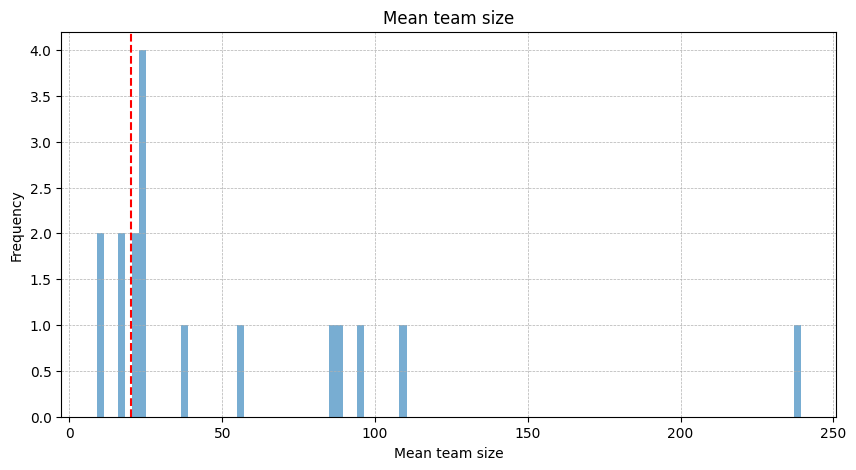

Mean team size: 53.18557840391017
Median team size: 24.21525700299157
Standard deviation: 58.21667776231618
Minimum team size: 8.850659264399722
Maximum team size: 239.44101739511768
More than 20 collaborators: 13


In [53]:

num_collaborators = data[data['project_id'].isin(filtered_project_ids_forks)].groupby('project_id')['team_size'].mean()

plt.figure(figsize=(10, 5))
plt.hist(num_collaborators, bins=100, alpha=0.6)
plt.axvline(x=20, color='r', linestyle='--')
plt.xlabel('Mean team size')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Mean team size')
plt.show()

print('Mean team size: {}'.format(num_collaborators.mean()))
print('Median team size: {}'.format(num_collaborators.median()))
print('Standard deviation: {}'.format(num_collaborators.std()))
print('Minimum team size: {}'.format(num_collaborators.min()))
print('Maximum team size: {}'.format(num_collaborators.max()))

filtered_project_ids_collab = num_collaborators[num_collaborators > 20].index
print('More than 20 collaborators: {}'.format(len(filtered_project_ids_collab)))


## Analysis of filtered data

In [54]:
print(data[data['project_id'].isin(filtered_project_ids_collab)]['reponame'].unique())
filtered_data = data[data['project_id'].isin(filtered_project_ids_collab)]
filtered_data

['scikit-learn' 'salt' 'metasploit-framework' 'kubernetes' 'react' 'node'
 'ansible' 'odoo' 'rails' 'matplotlib' 'ember.js' 'pandas' 'gatsby']


,id,project_id,ownername,reponame,merged_or_not,lifetime_minutes,mergetime_minutes,num_commits,src_churn,test_churn,...,other_comment,num_comments_con,num_code_comments,num_code_comments_con,integrator_availability,friday_effect,contrib_rate_author,reopen_or_not,first_close_minutes,reopen_num
30,31,5219,scikit-learn,scikit-learn,0,122459,NaN,3,201,504,...,1,8,199,2,60.0,0,0.000373,0,122459,0
34,35,1142,saltstack,salt,1,4534,4534.0,1,22,0,...,0,1,0,0,49.0,1,0.000622,0,4534,0
40,41,1142,saltstack,salt,1,983,983.0,1,193,0,...,0,0,0,0,3.0,0,0.000013,0,983,0
44,45,853,rapid7,metasploit-framework,1,131,131.0,1,2,0,...,0,0,0,0,159.0,0,0.000023,0,131,0
51,52,22091370,kubernetes,kubernetes,1,627,627.0,1,8,19,...,1,3,0,0,0.0,0,0.000459,0,627,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347814,3347815,48212908,pandas-dev,pandas,1,63531,63531.0,215,9804,13464,...,1,13,17,3,7.0,0,0.000274,1,10204,1
3347881,3347882,20078281,nodejs,node,1,11373,11373.0,4,16,0,...,1,9,0,0,197.0,0,0.012812,0,11373,0
3347882,3347883,853,rapid7,metasploit-framework,1,1248,1248.0,4,66,0,...,0,1,2,0,113.0,0,0.001935,0,1248,0
3347907,3347908,3905191,facebook,react,1,484,484.0,1,0,0,...,1,0,0,0,12.0,0,0.097158,0,484,0


C:\Users\kaitl\AppData\Local\Temp\ipykernel_24280\3750033236.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['log_mergetime_minutes'] = np.log(filtered_data['mergetime_minutes'] + 1)


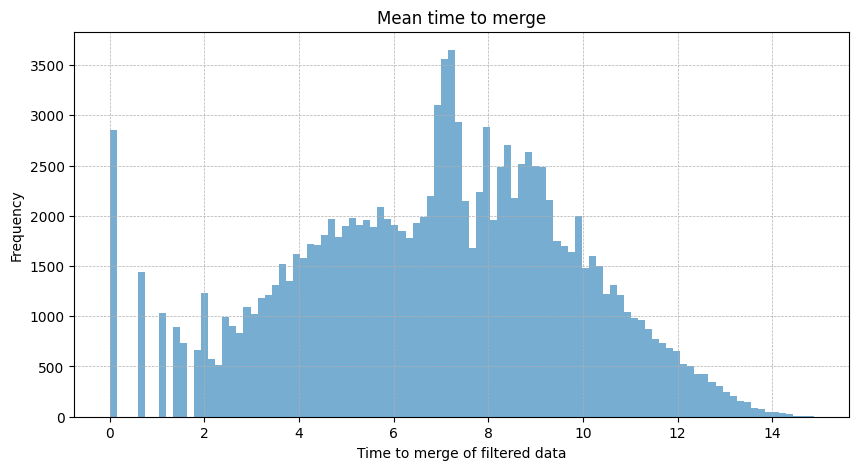

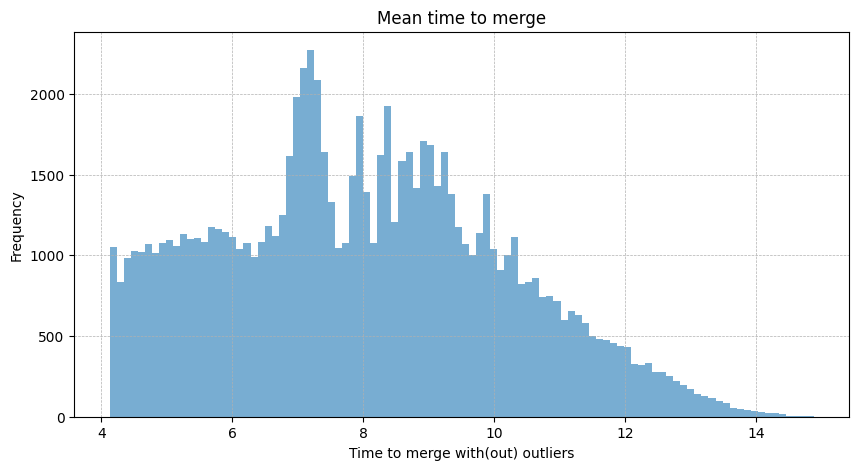

Number of pull requests before removing outliers: 186705
Number of pull requests after removing outliers: 88282


In [60]:
filtered_data['log_mergetime_minutes'] = np.log(filtered_data['mergetime_minutes'] + 1)
# filtered_df['filtered_mergetime_minutes'] = np.exp(filtered_df['log_mergetime_minutes']) - 1

plt.figure(figsize=(10, 5))
plt.hist(filtered_data['log_mergetime_minutes'], bins=100, alpha=0.6)
plt.xlabel('Time to merge of filtered data')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Mean time to merge')
plt.show()

# remove outliers
Q1 = filtered_data['log_mergetime_minutes'].quantile(0.25)
Q3 = filtered_data['log_mergetime_minutes'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

merged_data = filtered_data[(filtered_data['log_mergetime_minutes'] >= lower_bound) & (filtered_data['log_mergetime_minutes'] <= upper_bound)]
merged_data = merged_data[merged_data['mergetime_minutes'] > 60]
merged_data = merged_data[merged_data['files_changed'] > 0]
merged_data = merged_data[merged_data['src_churn'] > 0]

plt.figure(figsize=(10, 5))
plt.hist(merged_data['log_mergetime_minutes'], bins=100, alpha=0.6)
plt.xlabel('Time to merge with(out) outliers')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Mean time to merge')
plt.show()

print('Number of pull requests before removing outliers: {}'.format(len(filtered_data)))
print('Number of pull requests after removing outliers: {}'.format(len(merged_data)))



# Gender

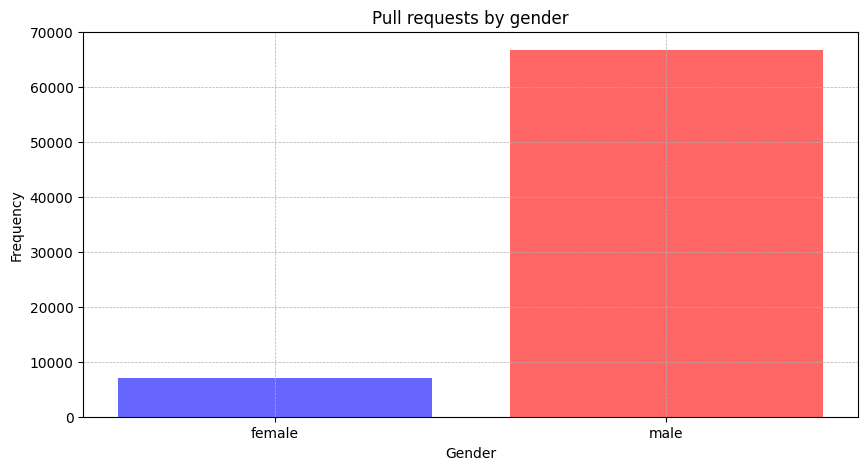

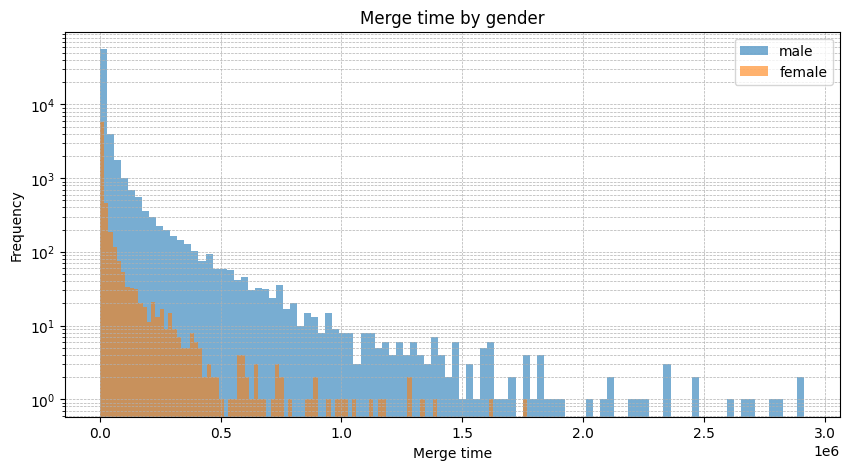

Shapiro-Wilk test for male contributors, merge time in minutes: W = 0.2654031906005151, p = 1.0926689926566859e-88
Shapiro-Wilk test for female contributors, merge time in minutes: W = 0.24853573129399464, p = 3.317572250239328e-89
Kruskal-Wallis H test, merge time in minutes: H = 59.66009456387295, p = 1.1273950612290343e-14
Mean merge time for male contributors: 28120.54474422232
Mean merge time for female contributors: 21984.896246610533
Median merge time for male contributors: 2676.0
Median merge time for female contributors: 1994.0
Standard deviation of merge time for male contributors: 104354.85504997463
Standard deviation of merge time for female contributors: 84747.72988219673
Maximum merge time for male contributors: 2916770.0
Maximum merge time for female contributors: 1768570.0
Minimum merge time for male contributors: 61.0
Minimum merge time for female contributors: 61.0


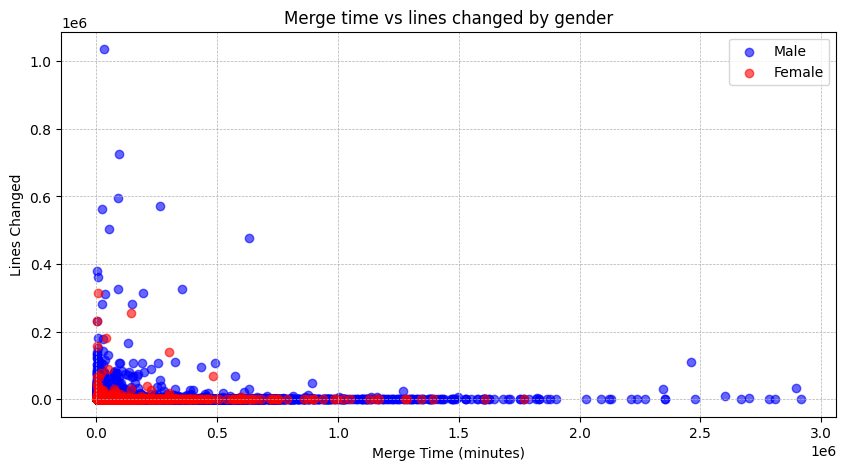

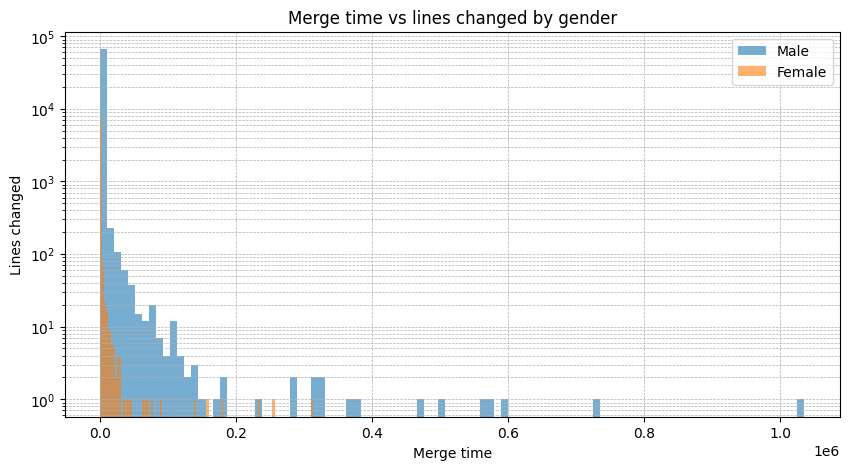

Shapiro-Wilk test for male contributors, number of lines changed: W = 0.02423083406561899, p = 2.8448308222818166e-95
Shapiro-Wilk test for female contributors, number of lines changed: W = 0.04224112504601807, p = 7.825324782910507e-95
Kruskal-Wallis H test, number of lines changed: H = 0.18880073377323583, p = 0.663916636198365
Mean lines changed for male contributors: 574.8042112209241
Mean lines changed for female contributors: 579.7194234337092
Median lines changed for male contributors: 25.0
Median lines changed for female contributors: 26.0
Standard deviation of lines changed for male contributors: 8647.192452177922
Standard deviation of lines changed for female contributors: 7006.981023196284
Maximum lines changed for male contributors: 1035360
Maximum lines changed for female contributors: 313140
Minimum lines changed for male contributors: 1
Minimum lines changed for female contributors: 1


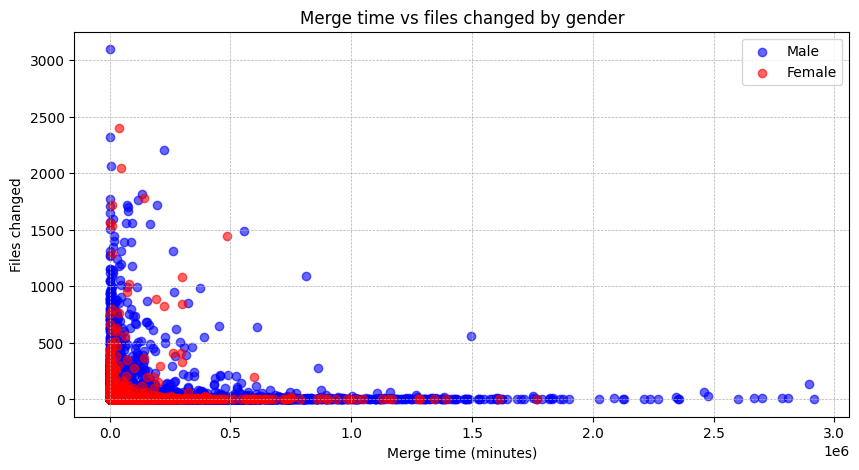

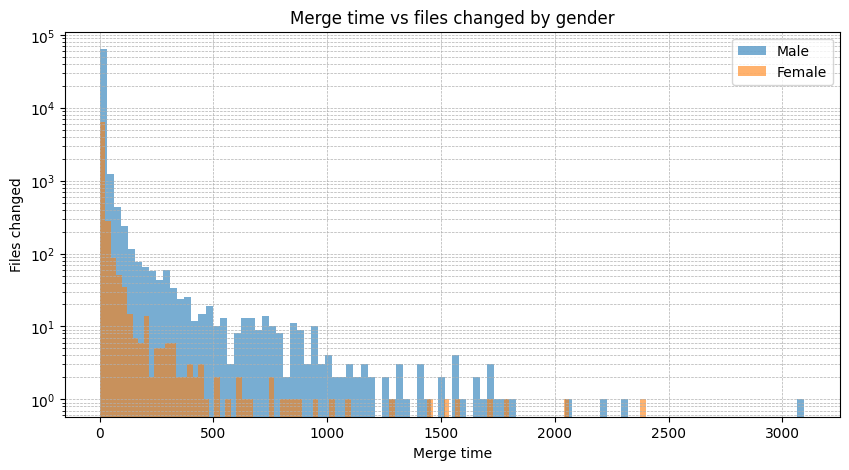

Shapiro-Wilk test for male contributors, number of files changed: W = 0.11303918989512518, p = 4.9433914735019735e-93
Shapiro-Wilk test for female contributors, number of files changed: W = 0.12484316366894133, p = 1.0147092662706643e-92
Kruskal-Wallis H test, number of files changed: H = 47.98589405520411, p = 4.29296591625494e-12
Mean files changed for male contributors: 9.715082709698706
Mean files changed for female contributors: 13.10332524618239
Median files changed for male contributors: 2.0
Median files changed for female contributors: 2.0
Standard deviation of files changed for male contributors: 58.18862742270481
Standard deviation of files changed for female contributors: 75.44836499018349
Maximum files changed for male contributors: 3097
Maximum files changed for female contributors: 2399
Minimum files changed for male contributors: 1
Minimum files changed for female contributors: 1


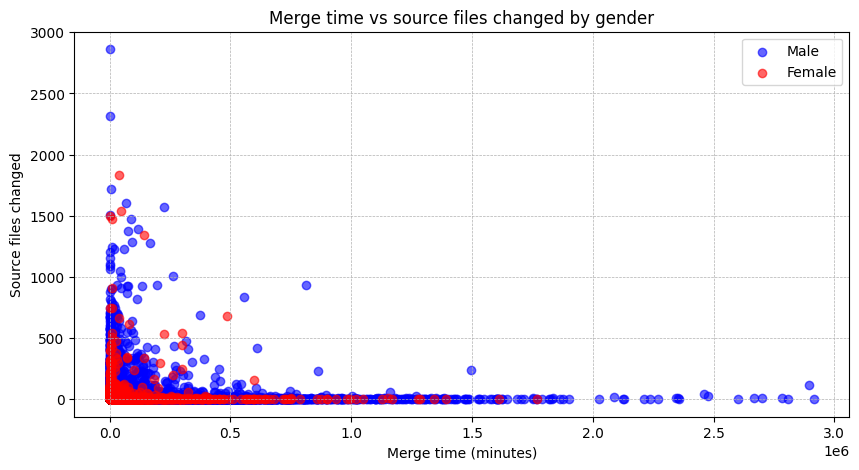

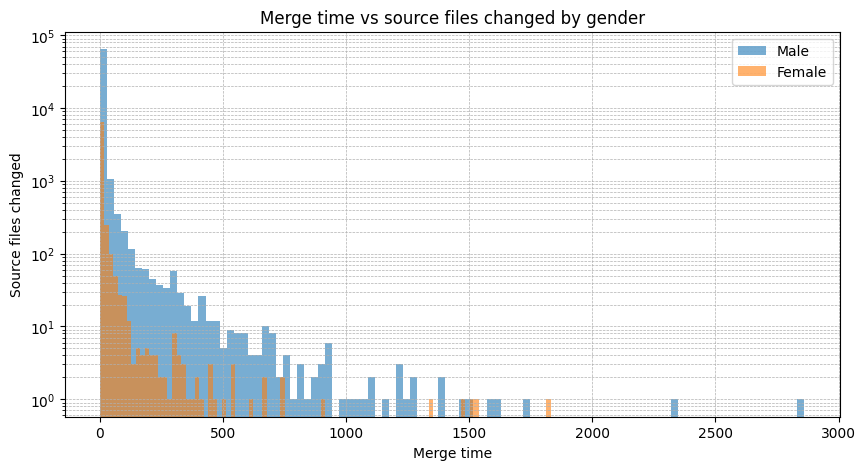

Shapiro-Wilk test for male contributors, number of source files changed: W = 0.1085696348776033, p = 3.7732220468858714e-93
Shapiro-Wilk test for female contributors, number of source files changed: W = 0.1273544156822345, p = 1.1837482576027063e-92
Kruskal-Wallis H test, number of source files changed: H = 63.043790065039204, p = 2.0216174537322346e-15
Mean source files changed for male contributors: 7.350455165794328
Mean source files changed for female contributors: 9.829456258027687
Median source files changed for male contributors: 2.0
Median source files changed for female contributors: 2.0
Standard deviation of source files changed for male contributors: 42.7585847291362
Standard deviation of source files changed for female contributors: 55.15795086187699
Maximum source files changed for male contributors: 2861
Maximum source files changed for female contributors: 1831
Minimum source files changed for male contributors: 1
Minimum source files changed for female contributors: 1


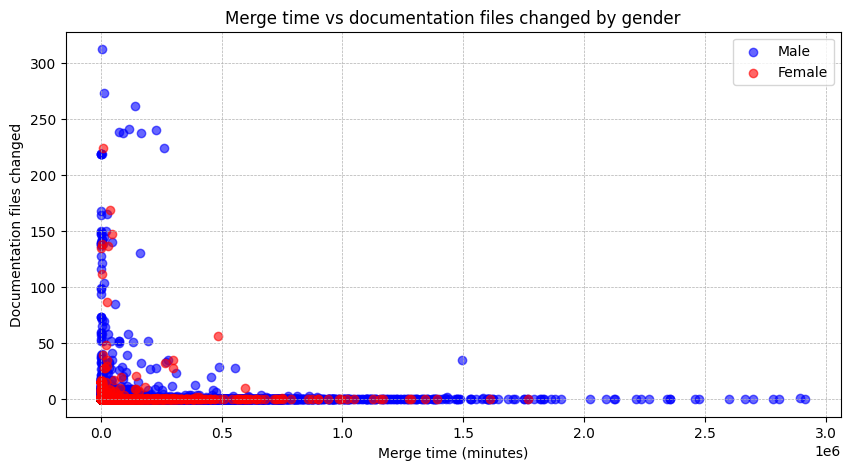

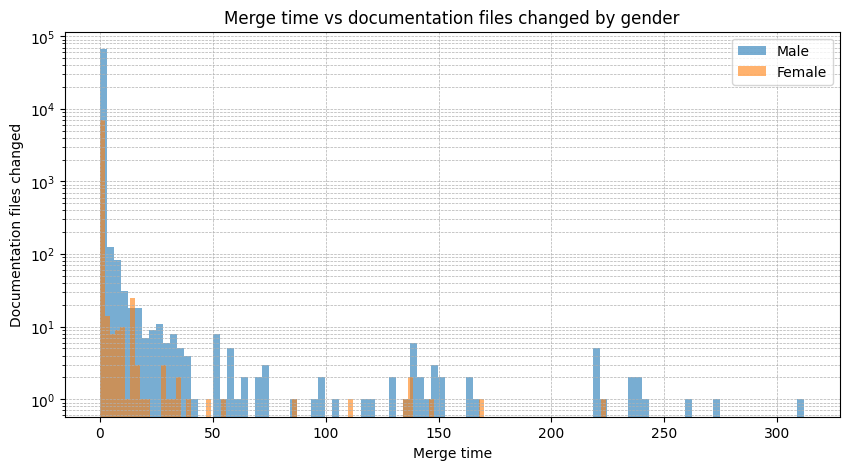

Shapiro-Wilk test for male contributors, number of documentation files changed: W = 0.020972984622643187, p = 2.3731419678737183e-95
Shapiro-Wilk test for female contributors, number of documentation files changed: W = 0.034146478630410426, p = 4.955757173930236e-95
Kruskal-Wallis H test, number of documentation files changed: H = 63.043790065039204, p = 2.0216174537322346e-15
Mean documentation files changed for male contributors: 0.20318241125391803
Mean documentation files changed for female contributors: 0.3430854859426288
Median documentation files changed for male contributors: 0.0
Median documentation files changed for female contributors: 0.0
Standard deviation of documentation files changed for male contributors: 4.670493654156858
Standard deviation of documentation files changed for female contributors: 5.329604573677159
Maximum documentation files changed for male contributors: 312
Maximum documentation files changed for female contributors: 224
Minimum documentation files c

In [71]:
gender = merged_data['contrib_gender'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(gender.index, gender.values, alpha=0.6, color=['blue', 'red'])
plt.xticks(gender.index, ['female', 'male'])
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Pull requests by gender')
plt.show()

male = merged_data[merged_data['contrib_gender'] == 'male']
female = merged_data[merged_data['contrib_gender'] == 'female']

plt.figure(figsize=(10, 5))
plt.hist(male['mergetime_minutes'], bins=100, alpha=0.6, label='male', log=True)
plt.hist(female['mergetime_minutes'], bins=100, alpha=0.6, label='female', log=True)
plt.xlabel('Merge time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time by gender')
plt.show()

sample_size = 5000
male_sample = male['mergetime_minutes'].sample(n=sample_size, random_state=1)
female_sample = female['mergetime_minutes'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, merge time in minutes: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, merge time in minutes: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['mergetime_minutes'], female['mergetime_minutes'])
print('Kruskal-Wallis H test, merge time in minutes: H = {}, p = {}'.format(H, p))

print('Mean merge time for male contributors: {}'.format(male['mergetime_minutes'].mean()))
print('Mean merge time for female contributors: {}'.format(female['mergetime_minutes'].mean()))
print('Median merge time for male contributors: {}'.format(male['mergetime_minutes'].median()))
print('Median merge time for female contributors: {}'.format(female['mergetime_minutes'].median()))
print('Standard deviation of merge time for male contributors: {}'.format(male['mergetime_minutes'].std()))
print('Standard deviation of merge time for female contributors: {}'.format(female['mergetime_minutes'].std()))
print('Maximum merge time for male contributors: {}'.format(male['mergetime_minutes'].max()))
print('Maximum merge time for female contributors: {}'.format(female['mergetime_minutes'].max()))
print('Minimum merge time for male contributors: {}'.format(male['mergetime_minutes'].min()))
print('Minimum merge time for female contributors: {}'.format(female['mergetime_minutes'].min()))

plt.figure(figsize=(10, 5))
plt.scatter(male['mergetime_minutes'], male['src_churn'], alpha=0.6, color='blue', label='Male')
plt.scatter(female['mergetime_minutes'], female['src_churn'], alpha=0.6, color='red', label='Female')
plt.xlabel('Merge Time (minutes)')
plt.ylabel('Lines Changed')
plt.title('Merge time vs lines changed by gender')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(male['src_churn'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['src_churn'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Merge time')
plt.ylabel('Lines changed')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time vs lines changed by gender')
plt.show()

sample_size = 5000
male_sample = male['src_churn'].sample(n=sample_size, random_state=1)
female_sample = female['src_churn'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, number of lines changed: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, number of lines changed: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['src_churn'], female['src_churn'])
print('Kruskal-Wallis H test, number of lines changed: H = {}, p = {}'.format(H, p))

print('Mean lines changed for male contributors: {}'.format(male['src_churn'].mean()))
print('Mean lines changed for female contributors: {}'.format(female['src_churn'].mean()))
print('Median lines changed for male contributors: {}'.format(male['src_churn'].median()))
print('Median lines changed for female contributors: {}'.format(female['src_churn'].median()))
print('Standard deviation of lines changed for male contributors: {}'.format(male['src_churn'].std()))
print('Standard deviation of lines changed for female contributors: {}'.format(female['src_churn'].std()))
print('Maximum lines changed for male contributors: {}'.format(male['src_churn'].max()))
print('Maximum lines changed for female contributors: {}'.format(female['src_churn'].max()))
print('Minimum lines changed for male contributors: {}'.format(male['src_churn'].min()))
print('Minimum lines changed for female contributors: {}'.format(female['src_churn'].min()))


plt.figure(figsize=(10, 5))
plt.scatter(male['mergetime_minutes'], male['files_changed'], alpha=0.6, color='blue', label='Male')
plt.scatter(female['mergetime_minutes'], female['files_changed'], alpha=0.6, color='red', label='Female')
plt.xlabel('Merge time (minutes)')
plt.ylabel('Files changed')
plt.title('Merge time vs files changed by gender')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(male['files_changed'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['files_changed'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Merge time')
plt.ylabel('Files changed')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time vs files changed by gender')
plt.show()

sample_size = 5000
male_sample = male['files_changed'].sample(n=sample_size, random_state=1)
female_sample = female['files_changed'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, number of files changed: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, number of files changed: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['files_changed'], female['files_changed'])
print('Kruskal-Wallis H test, number of files changed: H = {}, p = {}'.format(H, p))

print('Mean files changed for male contributors: {}'.format(male['files_changed'].mean()))
print('Mean files changed for female contributors: {}'.format(female['files_changed'].mean()))
print('Median files changed for male contributors: {}'.format(male['files_changed'].median()))
print('Median files changed for female contributors: {}'.format(female['files_changed'].median()))
print('Standard deviation of files changed for male contributors: {}'.format(male['files_changed'].std()))
print('Standard deviation of files changed for female contributors: {}'.format(female['files_changed'].std()))
print('Maximum files changed for male contributors: {}'.format(male['files_changed'].max()))
print('Maximum files changed for female contributors: {}'.format(female['files_changed'].max()))
print('Minimum files changed for male contributors: {}'.format(male['files_changed'].min()))
print('Minimum files changed for female contributors: {}'.format(female['files_changed'].min()))

plt.figure(figsize=(10, 5))
plt.scatter(male['mergetime_minutes'], male['src_files'], alpha=0.6, color='blue', label='Male')
plt.scatter(female['mergetime_minutes'], female['src_files'], alpha=0.6, color='red', label='Female')
plt.xlabel('Merge time (minutes)')
plt.ylabel('Source files changed')
plt.title('Merge time vs source files changed by gender')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(male['src_files'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['src_files'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Merge time')
plt.ylabel('Source files changed')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time vs source files changed by gender')
plt.show()

sample_size = 5000
male_sample = male['src_files'].sample(n=sample_size, random_state=1)
female_sample = female['src_files'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, number of source files changed: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, number of source files changed: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['src_files'], female['src_files'])
print('Kruskal-Wallis H test, number of source files changed: H = {}, p = {}'.format(H, p))

print('Mean source files changed for male contributors: {}'.format(male['src_files'].mean()))
print('Mean source files changed for female contributors: {}'.format(female['src_files'].mean()))
print('Median source files changed for male contributors: {}'.format(male['src_files'].median()))
print('Median source files changed for female contributors: {}'.format(female['src_files'].median()))
print('Standard deviation of source files changed for male contributors: {}'.format(male['src_files'].std()))
print('Standard deviation of source files changed for female contributors: {}'.format(female['src_files'].std()))
print('Maximum source files changed for male contributors: {}'.format(male['src_files'].max()))
print('Maximum source files changed for female contributors: {}'.format(female['src_files'].max()))
print('Minimum source files changed for male contributors: {}'.format(male['src_files'].min()))
print('Minimum source files changed for female contributors: {}'.format(female['src_files'].min()))

plt.figure(figsize=(10, 5))
plt.scatter(male['mergetime_minutes'], male['doc_files'], alpha=0.6, color='blue', label='Male')
plt.scatter(female['mergetime_minutes'], female['doc_files'], alpha=0.6, color='red', label='Female')
plt.xlabel('Merge time (minutes)')
plt.ylabel('Documentation files changed')
plt.title('Merge time vs documentation files changed by gender')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(male['doc_files'], bins=100, alpha=0.6, label='Male', log=True)
plt.hist(female['doc_files'], bins=100, alpha=0.6, label='Female', log=True)
plt.xlabel('Merge time')
plt.ylabel('Documentation files changed')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time vs documentation files changed by gender')
plt.show()

sample_size = 5000
male_sample = male['doc_files'].sample(n=sample_size, random_state=1)
female_sample = female['doc_files'].sample(n=sample_size, random_state=1)

res_male = shapiro(male_sample)
res_female = shapiro(female_sample)
print('Shapiro-Wilk test for male contributors, number of documentation files changed: W = {}, p = {}'.format(res_male.statistic, res_male.pvalue))
print('Shapiro-Wilk test for female contributors, number of documentation files changed: W = {}, p = {}'.format(res_female.statistic, res_female.pvalue))

H, p = kruskal(male['src_files'], female['src_files'])
print('Kruskal-Wallis H test, number of documentation files changed: H = {}, p = {}'.format(H, p))

print('Mean documentation files changed for male contributors: {}'.format(male['doc_files'].mean()))
print('Mean documentation files changed for female contributors: {}'.format(female['doc_files'].mean()))
print('Median documentation files changed for male contributors: {}'.format(male['doc_files'].median()))
print('Median documentation files changed for female contributors: {}'.format(female['doc_files'].median()))
print('Standard deviation of documentation files changed for male contributors: {}'.format(male['doc_files'].std()))
print('Standard deviation of documentation files changed for female contributors: {}'.format(female['doc_files'].std()))
print('Maximum documentation files changed for male contributors: {}'.format(male['doc_files'].max()))
print('Maximum documentation files changed for female contributors: {}'.format(female['doc_files'].max()))
print('Minimum documentation files changed for male contributors: {}'.format(male['doc_files'].min()))
print('Minimum documentation files changed for female contributors: {}'.format(female['doc_files'].min()))

# Country

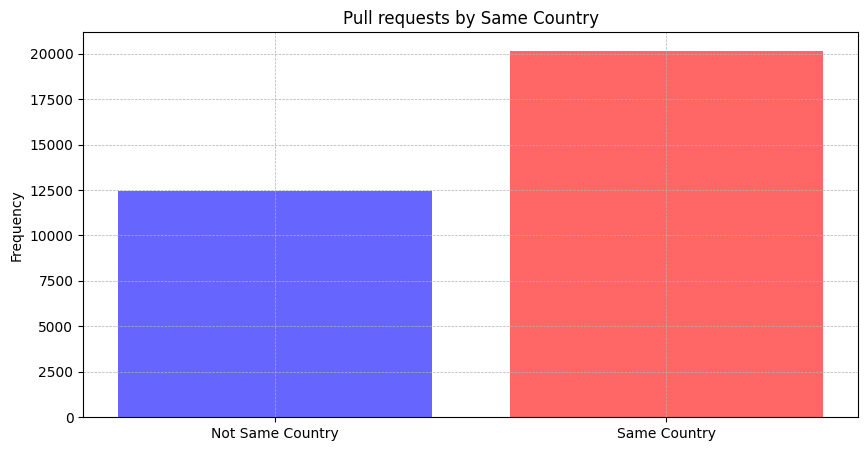

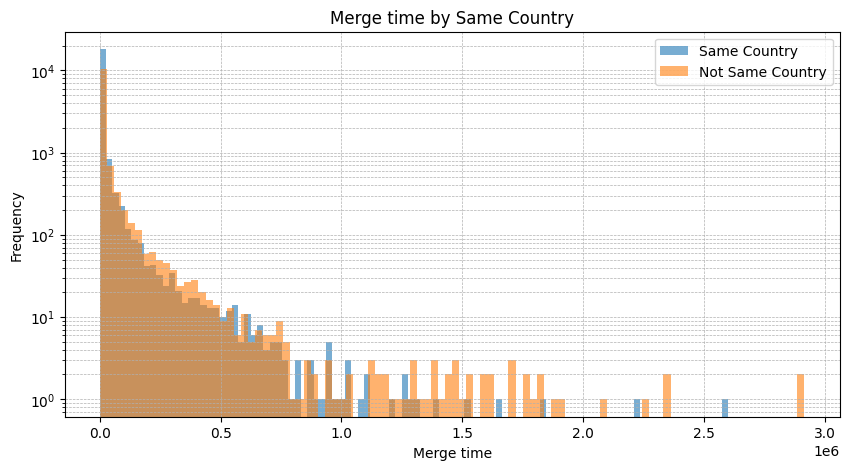

Shapiro-Wilk test for same country: W = 0.7802923465408798, p = 0.06827071356764525
Shapiro-Wilk test for not same country: W = 0.8278656833069713, p = 0.1829188222188608
Kruskal-Wallis H test: H = 448.74907848377455, p = 1.3500552697409377e-99
Mean merge time for same country: 17107.04696023009
Mean merge time for not same country: 32390.67797427653
Median merge time for same country: 1352.0
Median merge time for not same country: 2403.0
Standard deviation of merge time for same country: 75109.62434895568
Standard deviation of merge time for not same country: 128052.36938732909
Maximum merge time for same country: 2601780.0
Maximum merge time for not same country: 2916770.0
Minimum merge time for same country: 61.0
Minimum merge time for not same country: 61.0


In [62]:
same_country = merged_data['same_country'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(same_country.index, same_country.values, alpha=0.6, color=['blue', 'red'])
plt.xticks(same_country.index, ['Not Same Country', 'Same Country'])
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Pull requests by Same Country')
plt.show()

same_country = merged_data[merged_data['same_country'] == 1]
not_same_country = merged_data[merged_data['same_country'] == 0]

plt.figure(figsize=(10, 5))
plt.hist(same_country['mergetime_minutes'], bins=100, alpha=0.6, label='Same Country', log=True)
plt.hist(not_same_country['mergetime_minutes'], bins=100, alpha=0.6, label='Not Same Country', log=True)
plt.xlabel('Merge time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time by Same Country')
plt.show()

same_country_sample = same_country['mergetime_minutes'].sample(n=3, random_state=1)
not_same_country_sample = not_same_country['mergetime_minutes'].sample(n=3,random_state=1)

res_same_country = shapiro(same_country_sample)
res_not_same_country = shapiro(not_same_country_sample)
print('Shapiro-Wilk test for same country: W = {}, p = {}'.format(res_same_country.statistic, res_same_country.pvalue))
print('Shapiro-Wilk test for not same country: W = {}, p = {}'.format(res_not_same_country.statistic, res_not_same_country.pvalue))

H, p = kruskal(same_country['mergetime_minutes'], not_same_country['mergetime_minutes'])
print('Kruskal-Wallis H test: H = {}, p = {}'.format(H, p))

print('Mean merge time for same country: {}'.format(same_country['mergetime_minutes'].mean()))
print('Mean merge time for not same country: {}'.format(not_same_country['mergetime_minutes'].mean()))
print('Median merge time for same country: {}'.format(same_country['mergetime_minutes'].median()))
print('Median merge time for not same country: {}'.format(not_same_country['mergetime_minutes'].median()))
print('Standard deviation of merge time for same country: {}'.format(same_country['mergetime_minutes'].std()))
print('Standard deviation of merge time for not same country: {}'.format(not_same_country['mergetime_minutes'].std()))
print('Maximum merge time for same country: {}'.format(same_country['mergetime_minutes'].max()))
print('Maximum merge time for not same country: {}'.format(not_same_country['mergetime_minutes'].max()))
print('Minimum merge time for same country: {}'.format(same_country['mergetime_minutes'].min()))
print('Minimum merge time for not same country: {}'.format(not_same_country['mergetime_minutes'].min()))


# Affiliation

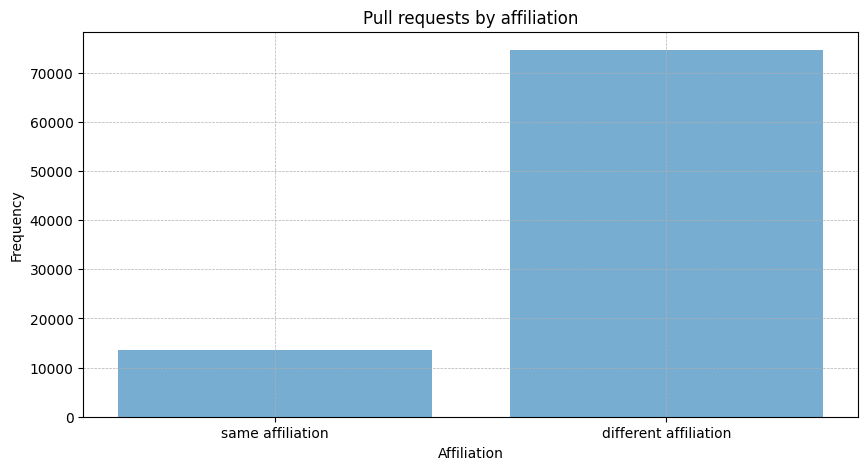

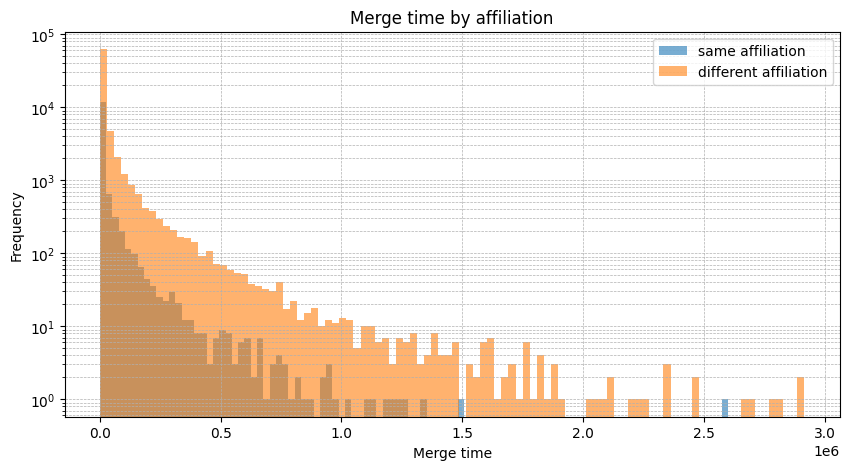

Shapiro-Wilk test for same affiliation: W = 0.2340245530297479, p = 1.211961753880725e-89
Shapiro-Wilk test for different affiliation: W = 0.27213041657620807, p = 1.7694376404610342e-88
Kruskal-Wallis H test: H = 563.2883698576525, p = 1.6191671652574644e-124
Mean merge time for same affiliation: 19361.22983279554
Mean merge time for different affiliation: 29873.45008439836
Median merge time for same affiliation: 1529.5
Median merge time for different affiliation: 2937.0
Standard deviation of merge time for same affiliation: 73499.13963307247
Standard deviation of merge time for different affiliation: 106504.05750562344
Maximum merge time for same affiliation: 2601780.0
Maximum merge time for different affiliation: 2916770.0
Minimum merge time for same affiliation: 61.0
Minimum merge time for different affiliation: 61.0


In [63]:
same_affiliation = merged_data[merged_data['contrib_affiliation'] == merged_data['inte_affiliation']]
diff_affiliation = merged_data[merged_data['contrib_affiliation'] != merged_data['inte_affiliation']]

plt.figure(figsize=(10, 5))
plt.bar(['same affiliation', 'different affiliation'], [len(same_affiliation), len(diff_affiliation)], alpha=0.6)
plt.xlabel('Affiliation')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Pull requests by affiliation')
plt.show()

plt.figure(figsize=(10, 5))
plt.hist(same_affiliation['mergetime_minutes'], bins=100, alpha=0.6, label='same affiliation', log=True)
plt.hist(diff_affiliation['mergetime_minutes'], bins=100, alpha=0.6, label='different affiliation', log=True)
plt.xlabel('Merge time')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.title('Merge time by affiliation')
plt.show()

sample_size = 5000
same_sample = same_affiliation['mergetime_minutes'].sample(n=sample_size, random_state=1)
diff_sample = diff_affiliation['mergetime_minutes'].sample(n=sample_size, random_state=1)

res_same = shapiro(same_sample)
res_diff = shapiro(diff_sample)
print('Shapiro-Wilk test for same affiliation: W = {}, p = {}'.format(res_same.statistic, res_same.pvalue))
print('Shapiro-Wilk test for different affiliation: W = {}, p = {}'.format(res_diff.statistic, res_diff.pvalue))

H, p = kruskal(same_affiliation['mergetime_minutes'], diff_affiliation['mergetime_minutes'])
print('Kruskal-Wallis H test: H = {}, p = {}'.format(H, p))

print('Mean merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].mean()))
print('Mean merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].mean()))
print('Median merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].median()))
print('Median merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].median()))
print('Standard deviation of merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].std()))
print('Standard deviation of merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].std()))
print('Maximum merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].max()))
print('Maximum merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].max()))
print('Minimum merge time for same affiliation: {}'.format(same_affiliation['mergetime_minutes'].min()))
print('Minimum merge time for different affiliation: {}'.format(diff_affiliation['mergetime_minutes'].min()))

# Team dynamics